# Project 1
## warm up

### Members:
* Akhilesh Vyas
* Pooja Bhatia
* Asif Altaf 
* Abakar Bouba
* Mehdi Ali
* Seyithan Dag
* Mihail Luchian
* Muhammad Hassan Farooq
* Utkrist Adhikari
* Julian Tanke

### Task 1.1

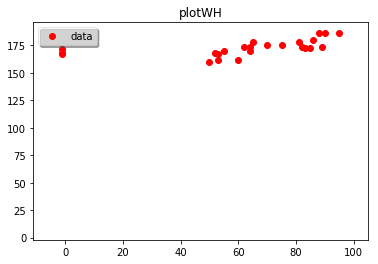

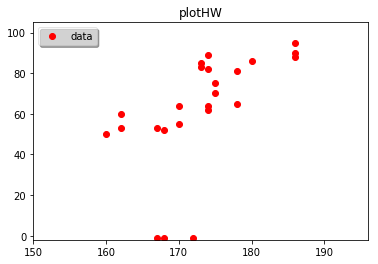

In [4]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt


def plotData2D(X, title):
    # create a figure and its axes
    fig = plt.figure()
    axs = fig.add_subplot(111)

    # see what happens, if you uncomment the next line
    # axs.set_aspect('equal')
    
    # plot the data 
    axs.plot(X[0,:], X[1,:], 'ro', label='data')

    # set x and y limits of the plotting area
    xmin = X[0,:].min()
    xmax = X[0,:].max()
    axs.set_xlim(xmin-10, xmax+10)
    axs.set_ylim(-2, X[1,:].max()+10)

    # set properties of the legend of the plot
    leg = axs.legend(loc='upper left', shadow=True, fancybox=True, numpoints=1)
    leg.get_frame().set_alpha(0.5)

    plt.title(title)
    plt.show()
    # either show figure on screen or write it to disk
    #if filename == None:
    #    plt.title(title)
    #    plt.show()
    #else:
    #    plt.savefig(filename, facecolor='w', edgecolor='w',
    #                papertype=None, format='pdf', transparent=False,
    #                bbox_inches='tight', pad_inches=0.1)
    



#######################################################################
# 1st alternative for reading multi-typed data from a text file
#######################################################################
# define type of data to be read and read data from file
dt = np.dtype([('w', np.float), ('h', np.float), ('g', np.str_, 1)])
data = np.loadtxt('whData.dat', dtype=dt, comments='#', delimiter=None)

# read height, weight and gender information into 1D arrays
ws = np.array([d[0] for d in data])
hs = np.array([d[1] for d in data])
gs = np.array([d[2] for d in data]) 


##########################################################################
# 2nd alternative for reading multi-typed data from a text file
##########################################################################
# read data as 2D array of data type 'object'
data = np.loadtxt('whData.dat',dtype=np.object,comments='#',delimiter=None)

# read height and weight data into 2D array (i.e. into a matrix)
X = data[:,0:2].astype(np.float)

# read gender data into 1D array (i.e. into a vector)
y = data[:,2]

# let's transpose the data matrix 
X = X.T

# now, plot weight vs. height using the function defined above
plotData2D(X, 'plotWH')

# next, let's plot height vs. weight 
# first, copy information rows of X into 1D arrays
w = np.copy(X[0,:])
h = np.copy(X[1,:])

# second, create new data matrix Z by stacking h and w
Z = np.vstack((h,w))

# third, plot this new representation of the data
plotData2D(Z, 'plotHW')


### Task 1.1

Plot the data without the outliers (Plot only positive weight entries)

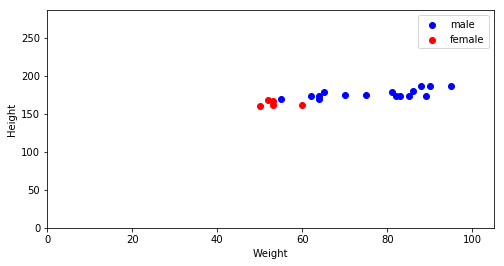

In [5]:
data = np.loadtxt('whData.dat',
                  dtype=np.object,
                  comments='#',
                  delimiter=None)

W = data[:,0].astype('float32')
H = data[:,1].astype('float32')
G = data[:,2]

w_mask = ((W > 0) * 1).nonzero()

W = W[w_mask]
H = H[w_mask]
G = G[w_mask]

male_mask = ((G == 'm') * 1).nonzero()
W_m = W[male_mask]
H_m = H[male_mask]

female_mask = ((G == 'f') * 1).nonzero()
W_f = W[female_mask]
H_f = H[female_mask]

fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(111)
ax.set_ylim([0, np.max(H)+100])
ax.set_xlim([0, np.max(W)+10])
ax.set_ylabel('Height')
ax.set_xlabel('Weight')
ax.scatter(W_m, H_m, color='blue', label='male')
ax.scatter(W_f, H_f, color='red', label='female')
plt.legend()
plt.show()

#### Pooja solution

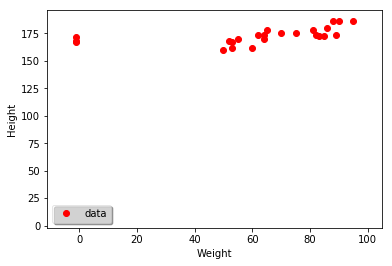

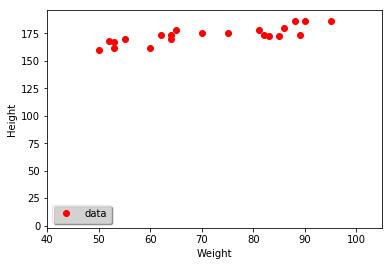

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def plotData2D(X, filename=None):
    # create a figure and its axes
    fig = plt.figure()
    axs = fig.add_subplot(111)
    
    # plot the data 
    axs.plot(X[0,:], X[1,:], 'ro', label='data')

    # set x and y limits of the plotting area
    xmin = X[0,:].min()
    xmax = X[0,:].max()
    axs.set_xlim(xmin-10, xmax+10)
    axs.set_ylim(-2, X[1,:].max()+10)
    axs.set_ylabel('Height')
    axs.set_xlabel('Weight')
    

    # set properties of the legend of the plot
    leg = axs.legend(loc='lower left', shadow=True, fancybox=True, numpoints=1)
    leg.get_frame().set_alpha(0.5)

    # either show figure on screen or write it to disk
    if filename == None:
        plt.show()
    else:
        plt.savefig(filename, facecolor='w', edgecolor='w',
                    papertype=None, format='pdf', transparent=False,
                    bbox_inches='tight', pad_inches=0.1)
    plt.close()

#######################################################################
# 1st alternative for reading multi-typed data from a text file
#######################################################################
# define type of data to be read and read data from file
dt = np.dtype([('w', np.float), ('h', np.float), ('g', np.str_, 1)])
data = np.loadtxt('whData.dat', dtype=dt, comments='#', delimiter=None)

# read height, weight and gender information into 1D arrays
ws = np.array([d[0] for d in data])
hs = np.array([d[1] for d in data])
gs = np.array([d[2] for d in data]) 


##########################################################################
# 2nd alternative for reading multi-typed data from a text file
##########################################################################
# read data as 2D array of data type 'object'
data = np.loadtxt('whData.dat',dtype=np.object,comments='#',delimiter=None)

# read height and weight data into 2D array (i.e. into a matrix)
X = data[:,0:2].astype(np.float)

# read gender data into 1D array (i.e. into a vector)
y = data[:,2]

# let's transpose the data matrix 
X = X.T

# now, plot weight vs. height using the function defined above
plotData2D(X)

#######################################################################
# Plot the data without the outliers (Plot only positive weight entries)
#######################################################################                   
weight=X[0,:]
height=X[1,:]
gender=y
i=1
l = []
for i in zip((weight>0)*1,(height>0)*1):
    l.append(i[0]and i[1])
WH_mask=np.array(l).nonzero()
weight=weight[WH_mask]
height=height[WH_mask]
gender=gender[WH_mask]
combined = np.vstack((weight,height))
plotData2D(combined)

### task 1.2: fitting a Normal distribution to 1D data

$$
g(x) = \frac{1}{\sigma \sqrt{2\pi}} \ \mathrm{exp} \big[ 
-\frac{1}{2} \big( 
\frac{x-\mu}{\sigma}
\big)^2
\big]
$$

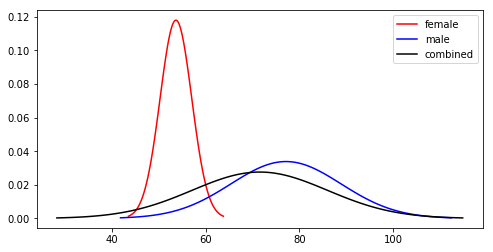

In [19]:
import matplotlib.mlab as mlab

mu_f = np.mean(W_f)
std_f = np.std(W_f)
mu_m = np.mean(W_m)
std_m = np.std(W_m)

W = np.append(W_f, W_m)
mu = np.mean(W)
std = np.std(W)

def plot_gaussian(ax, mu, sigma, color, label):
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    ax.plot(x,mlab.normpdf(x, mu, sigma), color=color, label=label)


fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(111)

plot_gaussian(ax, mu_f, std_f, color='red', label='female')
plot_gaussian(ax, mu_m, std_m, color='blue', label='male')
plot_gaussian(ax, mu, std, color='black', label='combined')
plt.legend()
plt.show()

### task 1.3 fitting a Weibull distribution to 1D data

**PDF** of Weibull distribution: $$
f(x \ \big\vert \ \kappa, \alpha) = \frac{\kappa}{\alpha} \big(
\frac{x}{\alpha}
\big)^{\kappa - 1} exp\biggr[ - \big(
\frac{x}{\alpha}
\big)^{\kappa} \biggr]
$$

with $\alpha, \kappa$ being shape and scale parameter

**Log-likelihood** given a data sample $D=\{ d_i\}_{i=1}^N$:
$$
L(\alpha, \kappa \ \big\vert \ D) = N(\log \kappa - \kappa \log \alpha)
+ (\kappa -1) \sum_i \log d_i - \sum_i \big(\frac{d_i}{\alpha}\big)^{\kappa}
$$

Deriving $L$ w.r.t. $\alpha, \kappa$ leads to a coupled system of partial differential equations for which there is no closed form solution. Therefore, resort to Newton's method for simultaneous equations and compute:
$$
\begin{bmatrix}
\kappa^{new}\\ 
\alpha^{new}
\end{bmatrix} = \begin{bmatrix}
\kappa\\ 
\alpha
\end{bmatrix} + 
\begin{bmatrix}
\frac{\partial^2L}{\partial\kappa^2} & \frac{\partial^2L}{\partial\kappa \partial \alpha} \\ 
\frac{\partial^2L}{\partial\kappa \partial \alpha} & 
\frac{\partial^2L}{\partial\alpha^2} 
\end{bmatrix}^{-1}
\begin{bmatrix}
-\frac{\partial L}{\partial\kappa} \\ 
-\frac{\partial L}{\partial\alpha}
\end{bmatrix}
$$

below we write the formulas for the gradient vectors in a more elegant way:

$$
\frac{\partial L}{\partial \kappa} = \frac{N}{\kappa} - N \log \alpha + 
\sum_i \log d_i - \sum_i \big( \frac{d_i}{\alpha} \big)^{\kappa} \log \frac{d_i}{\alpha} = 
\frac{N}{\kappa} - N \log \alpha + 
\sum_{j=1}^n \log j \cdot h_j - \sum_{j=1}^n (\frac{j}{\alpha})^k \log \frac{j}{\alpha} \cdot h_j
$$

$$
\frac{\partial L}{\partial \alpha} = \frac{\kappa}{\alpha} \biggr( 
\sum_i \big(\frac{d_i}{\alpha} \big)^{\kappa} -N
\biggr) =
\frac{\kappa}{\alpha} \biggr( 
\sum_{j=1}^n (\frac{j}{\alpha})^{\kappa} \cdot h_j - N
\biggr)
$$

$$
\frac{\partial^2 L}{\partial \kappa^2} = \frac{-N}{\kappa^2} - \sum_i \big( 
\frac{d_i}{\alpha}\big)^{\kappa} \big( 
\log \frac{d_i}{\alpha}
\big)^2 = 
\frac{-N}{\kappa^2} - \sum_{j=1}^n \big(\frac{j}{\alpha} \big)^{\kappa} \log \big( \log \frac{j}{\alpha} \big)^2 \cdot h_j
$$

$$
\frac{\partial^2  L}{\partial  \alpha^2} = \frac{\kappa}{\alpha^2} \biggr(
N - (\kappa +1 ) \sum_i \big( \frac{d_i}{\alpha} \big)^{\kappa}
\biggr)  = \frac{\kappa}{\alpha^2} \biggr(
N - (\kappa +1 ) \sum_{j=1}^n \big( \frac{j}{\alpha} \big)^{\kappa} \cdot h_j
\biggr)
$$

$$
\frac{\partial^2 L}{\partial \kappa \partial \alpha} = \frac{1}{\alpha} \sum_i \big( \frac{d_i}{\alpha}\big)^{\kappa} + \frac{\kappa}{\alpha} \sum_i \big( \frac{d_i}{\alpha} \big)^{\kappa}
\log \frac{d_i}{\alpha} - \frac{N}{\alpha}  = 
\frac{1}{\alpha} 
\sum_{j=1}^n \big( \frac{j}{\alpha}\big)^{\kappa} \cdot h_j + 
\frac{\kappa}{\alpha} 
\sum_{j=1}^n \big( \frac{j}{\alpha} \big)^{\kappa}
\log \frac{j}{\alpha} \cdot h_j - \frac{N}{\alpha}
$$

Where $\bf{h}$ is the data histogram as stated in the task

a k: 1.42979746223 0.978272975333
a k: 198.50008376 1.48493522283
a k: 205.884146206 2.04283459404
a k: 210.985725255 2.44565021761
a k: 213.598638202 2.65768908098
a k: 215.428569903 2.80856013341


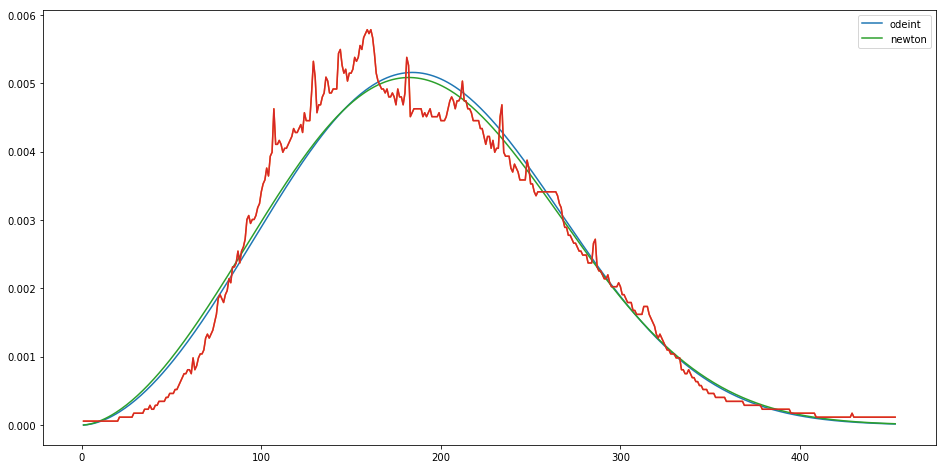

In [8]:
from numpy import genfromtxt
from numpy import genfromtxt
import numpy as np
import math
from scipy.integrate import odeint

import matplotlib.pyplot as plt

data = genfromtxt('myspace.csv', delimiter=',', dtype=np.object)
y = data[:, 1].astype('int32')
mask = ((y > 0) * 1).nonzero()
y = y[mask]
N = y.shape[0]

h = []
for i in range(N):
    h += [i + 1] * y[i]
h = np.array(h)


def f(x, a, k):
    """ weibull pdf
    """
    return (k / a) * np.power(x / a,k - 1) * np.exp(-np.power(x / a,k))


def L(a,k,D):
    N = D.shape[0]
    return N*(np.log(k) - k*np.log(a)) + (k-1)*np.sum(np.log(D)) - np.sum((D/a)**k)


def dLdk(a, k, D):
    N = D.shape[0]
    temp = D/a

    grad = N/k - N * np.log(a) + np.sum(np.log(D)) - \
           np.sum(np.power(temp,k) * np.log(temp))
    return grad


def dLda(a, k, D):
    N = D.shape[0]
    t1 = np.sum(np.power(D / a,k) - N)
    t2 = k/a
    grad = (k/a) * (np.sum(np.power(D / a,k)) - N)
    return grad


def d2Ldk2(a, k, D):
    N = D.shape[0]
    return -(N/k)**2 - np.sum(np.power(D/a,k) * np.power(np.log(D/a),2))


def d2Lda2(a, k, D):
    N = D.shape[0]
    return k/(a*a) * (N - (k+1)*np.sum(np.power(D/a,k)))


def d2Ldkda(a, k, D):
    N = D.shape[0]
    return (1 / a) * np.sum(np.power(D/a,k)) + \
           (k / a) * np.sum(np.power(D/a,k) * np.log(D / a)) - \
            N/a



def step(a, k, D):
    v = np.array([k, a])
    u = np.array([dLdk(a, k, D), dLda(a, k, D)])
    # print('u:',u)
    d2Ldkda_ = d2Ldkda(a, k, D)
    J = np.linalg.inv(np.array([
        [d2Ldk2(a, k, D), d2Ldkda_],
        [d2Ldkda_, d2Lda2(a, k, D)]
    ]))

    v_new = v - np.matmul(J,u)
    return v_new[1], v_new[0]


a_nwt, k_nwt = 1, 1

#newton method
for i in range(50000):
    a_nwt, k_nwt = step(a_nwt, k_nwt, h)
    if i % 10000 == 0:
        print('a k:',a_nwt, k_nwt)

# ODEINT
a, k = 1, 1

def calc_gradient(y,t):
    k,a = y
    global h
    return [dLdk(a,k,h), dLda(a,k,h)]

sol = odeint(calc_gradient,[k,a],np.linspace(0,100,10000))
# print(sol)
k,a = sol[-1,:]

print('a k:',a,k)
# print(L(210,3.2,h))
plot_x = np.linspace(1,y.shape[0],y.shape[0])
plot_y = f(plot_x,a,k)

plot_y_nwt = f(plot_x,a_nwt,k_nwt)

fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)

ax.plot(plot_x,plot_y, label='odeint')
ax.plot(plot_x,y/np.sum(y))


ax.plot(plot_x,plot_y_nwt, label='newton')
ax.plot(plot_x,y/np.sum(y))

plt.legend()
plt.show()

### 1.4

The **$l_p$-norm** of $x$ is given by:
$$
\vert|  x \vert|_p = \biggr(
\sum_{i=1}^m \vert x_i \vert^p 
\biggr)^{\frac{1}{p}}
$$

When $p=\frac{1}{2}$, we get the following equation:
$$
\big\vert\big\vert \begin{pmatrix}
x\\ 
y
\end{pmatrix} \big\vert\big\vert_{\frac{1}{2}} =
\big(
\sqrt{\vert x\vert} +  \sqrt{\vert y\vert} \
\big)^2
$$

A **norm** must fulfill the following properties:
* $d(a \vec{v}) = \vert a \vert \ d(\vec{v})$
* $d(\vec{u}+\vec{v}) \leq d(\vec{u}) + d(\vec{v})$
* $d(\vec{v}) \geq 0$
* $d(\vec{v}) = 0 \ \ \Rightarrow \ \vec{v}=0$

---


We will prove by counter example:

Lets say that $\vec{u} = \begin{vmatrix}
0 \\ 1
\end{vmatrix}, \vec{v} = \begin{vmatrix}
1 \\ 0
\end{vmatrix}$, where $||\vec{u}|| = 1, ||\vec{v}|| =1$

$$
|| \vec{u} + \vec{v} || = || \begin{vmatrix}
1\\ 
1
\end{vmatrix} || = 4 = (1+1)^2
$$

But now $|| \vec{u} + \vec{v} || > ||\vec{u} || + || \vec{v} ||$ which does not respect the condition.

QED

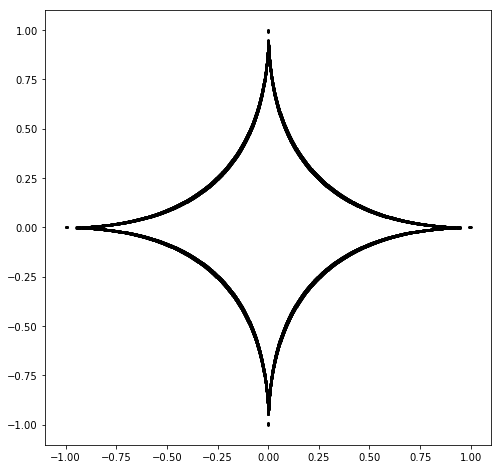

In [10]:
from scipy.linalg import norm


def plot_lp_norm(ax, p=2):
    """ this function helps warming up your home!
    """
    x = np.linspace(-1, 1, 2001)
    y = np.linspace(-1, 1, 2001)
    points_x = []
    points_y = []
    for _x in x:
        for _y in y:
            vec = np.array([_x, _y])
            v = norm(vec, p)
            if v < 1.01 and v > 0.99:
                points_x.append(_x)
                points_y.append(_y)
    ax.scatter(points_x, points_y, color='black', s=2)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
plot_lp_norm(ax, 1/2)

### 1.5 estimate the dimension of fractal objects in images

**Practical application for least square for linear regression**

*Box counting* is a method to determine the **fractal dimension** of an object in an image. For simplicity, let us focus on square images whose width/height are a power of two, e.g.:

$$w=h=2^L=512 \Leftrightarrow L=9$$

Given such an image we have to apply three steps:

* (1) apply appropriate binarization with foreground pixels set to 1 and background pixels set to 0
* (2) specify set $S$ of scaling factors $0<s_i<1$, for instance: $S=\biggr\{ \frac{1}{2^i} \ \biggr\vert \ i \in \{ 1,2,...,L-2\} \biggr\}$ and for each $s_i \in S$ cover the binary image with boxes of size $s_i \ w \times s_i \ h$ and count the number $n_i$ of boxes which contain at least one foreground pixel
* (3) plot $\log n_i$ against $\log \frac{1}{s_i}$ and fit a line $$
D \cdot \log \frac{1}{s_i} + b = \log n_i
$$

/home/julian/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  del sys.path[0]
/home/julian/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  from ipykernel import kernelapp as app


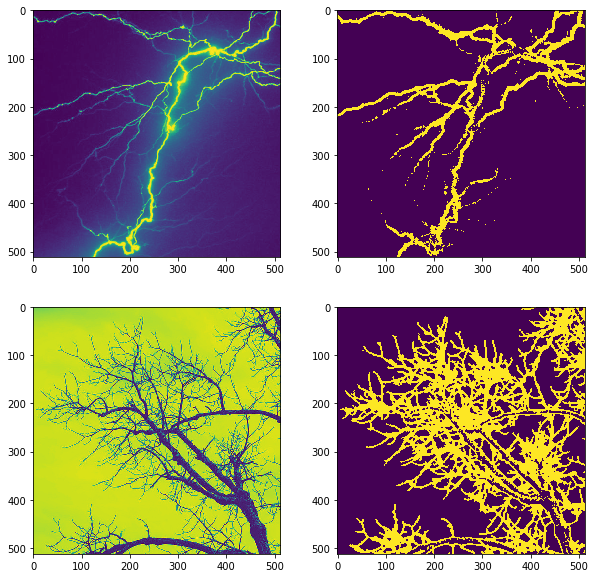

In [4]:
import numpy as np
import scipy.misc as msc
import scipy.ndimage as img

def foreground2Binimg(f):
    d = img.filters.gaussian_filter(f, sigma=0.5, mode='reflect') - \
        img.filters.gaussian_filter(f, sigma=1, mode='reflect')
    d = np.abs(d)
    m = d.max()
    d[d< 0.1 * m] = 0
    d[d>=0.1 * m] = 1
    return img.morphology.binary_closing(d)

f_l = msc.imread('lightning-3.png', flatten=True).astype('float32')
g_l = foreground2Binimg(f_l)
f_t = msc.imread('tree-2.png', flatten=True).astype('float32')
g_t = foreground2Binimg(f_t)

fig = plt.figure(figsize=(10,10))
fig.add_subplot(221).imshow(f_l)
fig.add_subplot(222).imshow(g_l)
fig.add_subplot(223).imshow(f_t)
fig.add_subplot(224).imshow(g_t)
plt.show()

N_lightning:	 [   4   14   45  147  404 1064 2905]
N_tree:		 [   4   16   61  218  777 2679 8685]
Fractal D: (lightning):	 1.57768502708
Fractal D: (tree):	 1.84639005655


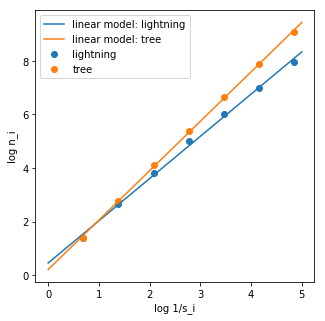

In [5]:
from scipy.stats import linregress

L = 9
S = np.array([1/2**i for i in range(1, L-1)])

def count_boxes(g, s_i):
    h,w = g.shape
    assert(h == w)
    sub_w = int(w * s_i)
    times_w = int(w/sub_w)
    
    n = 0
    for _x in range(0, times_w):
        for _y in range(0, times_w):
            x = _x * sub_w
            y = _y * sub_w
            I = g[y:y+sub_w,x:x+sub_w]
            count = np.sum(I)
            if count > 0:
                n += 1
    return n

N_l = np.array([count_boxes(g_l, s_i) for s_i in S])
N_t = np.array([count_boxes(g_t, s_i) for s_i in S])
print("N_lightning:\t", N_l)
print("N_tree:\t\t", N_t)

def get_fractal_dim(N, S):
    log_1ovS = np.log(1/S)
    log_N = np.log(N)
    
    R = linregress(x=log_1ovS, y=log_N)
    D = R.slope
    b = R.intercept
    return D, b
    
D_l, b_l = get_fractal_dim(N_l, S)
D_t, b_t = get_fractal_dim(N_t, S)

fractal_dim_lightning, fractal_dim_tree = D_l, D_t


print("Fractal D: (lightning):\t", fractal_dim_lightning)
print("Fractal D: (tree):\t", fractal_dim_tree)
    
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.set_xlabel('log 1/s_i')
ax.set_ylabel('log n_i')
ax.scatter(np.log(1/S), np.log(N_l), label='lightning')
ax.scatter(np.log(1/S), np.log(N_t), label='tree')

ax.plot([0, 5], [D_l * 0 + b_l, D_l * 5 + b_l], 
        label='linear model: lightning')
ax.plot([0, 5], [D_t * 0 + b_t, D_t * 5 + b_t], 
        label='linear model: tree')

plt.legend()
plt.show()